# Analysis of the  ZooLake dataset versions
This notebook contains an explorative data analysis to compare the class distirbutions of the diffrent dataset versions of ZooLake. It's based on the original file `analyse_dataset.py` from the repo [plankifier](https://github.com/mbaityje/plankifier/tree/master) by M. Baitsy. 

## 1 Introduction
The ZooLake dataset is an open data project from Eawag that aims to automate the classification of 35 different lake plankton species using deep learning and other machine learning algorithms. The objective of the image classification is to enable the monitoring of the different plankton populations over time, as plankton are effective indicators of environmental change and ecosystem health in freshwater habitats.

The collection of images of plankton is an ongoing process, with the objective of improving the classification through the addition of more images. the most recent images that have not yet been manually labelled by a taxonomist can be viewed at the webpage [Aquascope](https://aquascope.ch/)  under the heading 'Latest Greifensee.' The new unlabelled images are being labelled manually by taxonomists over time. Once a sufficient number of images have been labelled or used for a scientific paper, a new labelled collection is published. These diffrent collections of labeld images represent the ZooLake versions. 

The data set also include files, to recreate the same test/validation/train to make the model training and testing of the models comparable and reproducible.

### 1.1 Public data set versions

As of the present date, 20 September 2024, they are a two version of the ZooLake data set aviable for the public on the eawag open research page eric. This inculde following Versions:

- [ZooLake](https://opendata.eawag.ch/dataset/deep-learning-classification-of-zooplankton-from-lakes),  is the initial version of the dataset referenced by the paper 'Deep Learning Classification of Lake Zooplankton' with a tota of 17900 labelled images.

- [Zoolake2.0](https://data.eawag.ch/dataset/data-for-producing-plankton-classifiers-that-are-robust-to-dataset-shift), second version of the data set, which include more labelled data and the introduction of the *out-of-dataset (OOD)*. The OOD was utilised by C. Cheng et al. (2024) in their research into producing plankton classifiers that are robust to dataset shift. It also mentioned there,  that the ZooLake2.0 images come with a 2-year gap of the fist ZooLake Version and a total of 24'000 images


-  [Zoolake3.0](https://opendata.eawag.ch/) incomming...
 

### 1.2 Objectives of the explorativ analysis

This explorativ data anlysis notebook aim to research following points:

- Are they any  duplicates images?
- How are the distirbutions of the diffrent planton classes compared over the differnt data sets
- Are the old version subsets of the new versions, as mentioned by Chen et la.
- Are they any data leakage betweens the old and new versions test/train splits


## 2 Data structure

As previously stated in the introduction, the data was obtained from the open-source webpage eric on the eawag website. In order to achieve the previously stated objectives of the analysis, it is necessary to take a closer look at the structure of the data structure.

### 2.1 Folder structure of each version

The data structure of the different versions is organised in the manner demonstrated below. The data set of the first version is displayed on the left, with that of the second version shown on the right.

```md

            ZooLake1                                  ZooLake2.0
        zooplankton_0p5x/                           zooplankton2/  
        ├── aphanizomenon/                          ├── aphanizomenon/
        │   ├── training_data/                      │   ├── image1.jpg    
        │   │   ├── image1.jpeg                     │   └── ...│        
        │   │   └── ...                             ├── class2/
        │   └── features.tsv                        │   ├── image1.jpg         
        ├── class2/                                 │   ├── image2.jpg
        │   ├── training_data                       │   └── ...   
        │   │   ├── image1.jpeg                     ├── ...                 
        │   │   └── ...                             └── Files_used_for_training_testing.pickle                                             
        │   └── features.tsv                                           
        ├──  ...
        └──  zoolake_train_test_val_separated/ 
            ├── classes_ERIC.npy
            ├── Data.pickle
            ├── test_filenames.txt
            ├── train_filenames.txt
            └── val_filenames.txt        
            
``` 

In both data sets, the 35 folders representing a plankton species with classified images of the plankton represent the most significant information within the dataset. Version 1 of the data set differs from version 2 in thetween each plankton class folder and images there is a folder named `training_data` and the file `features.tsv`. It should be noted that the folder named as `training_data` does not contain details regarding the training data for the model, contrary to assumptions that might be made.  The .tsv files contain the data used for the classification model referenced in Deep Learning Classification of Lake Zooplankton by Kyathanahally, S. et al. It is anticipated that the folder structure will align with that of ZooLake Version 2 for subsequent versions.

### 2.2 Files for the resconstruction of the train/val/test split

The train/validation and test split utilised in the linked publication of the dataset can be replicated with the provided split information in the different versions. Both versions of ZooLake include a list of each image name and its corresponding split. However, there is a discrepancy in the manner of storage. 
 

- [ZooLake1]() The image file names that should be used to recreate the split are listed in the folder zoolake_train_test_val_separated in the form of different text files. The text files are labelled with the names of the splits.

- [ZooLake2]() The split is contained within in the only pickle file  `Files_used_for_training_testing.pickle` as a pd.DatFrame object. Based on the provided code by C.Chen in the function  [SplitFromPickle insidetrain_val_test_split.py  in the Plankiformer_OOD](https://github.com/cchen07/Plankiformer_OOD/blob/main/utils_analysis/train_val_test_split.py), it is assumed that the image names used for the training set are in the first column, for the validation set in the second, and for the test set in the third. 
### 2.3 Strurte of the image name

The file names of the individual images and folders contain comprehensive information regarding the specific class, the time at which the image was captured, and further details about the region of interest (RoI) that was identified.  The region of interest (RoI) contains the plankton organisms.   


\begin{array}{cccccccccccccccccc}
\text{SPC-EAWAG-0P5X-} & \text{1559498410-} & \text{191177-} & \text{6403834470-} & \text{952-} & \text{000009-} & \text{061-} & \text{1220-} & \text{2378-} & \text{52-} & \text{40} & \text{.jpeg} \\
\textit{1} &   \textit{2} &   \textit{3} &   \textit{4} &  \textit{5} &   \textit{6} &   \textit{7} &   \textit{8} &   \textit{9} &   \textit{10} &  \textit{11}
\end{array}

**Data Field Descriptions for SPC-EAWAG-0P5X Image**

| **Field** | **Description**                     |
|-----------|-------------------------------------|
| 1         | Camera name                         |
| 2         | Unixtime                            |
| 3         | Camera micros (microseconds)        |
| 4         | Frame number                        |
| 5         | RoI number (Region of Interest)     |
| 6         | RoI left position                   |
| 7         | RoI top position                    |
| 8         | RoI width                           |
| 9         | Roi height                          |
| 10        | Image width                         |
| 11        | Image height                        |


### 2.4 Local data strcutur

The local data folder structure for this repository is based on the cookie-cutter layout, as illustrated in the structure tree below. The folder designated for external data has been removed, as there is no external data utilised in this project. 


```md
    data
    ├── interim        <- Intermediate data with all images from the diffrent dataset versions.
    ├── processed      <- Data sets for the current modeling, splitted by train/test/validation/OOD.
    └── raw            <- original data, correspond the files downloaded from the eric portal.
```



## 3 Hashing of images 

The hashing of images is a widely used approach to handle a great amount of images since it reduces the image to a hash value that is a string. As the same image should always generate the same image hash using the same algorithm, the calculated hash value can be stored inside a SQL or No-Sql databse and one can check not only on the image 

Classic cryptographic hash algorithms compress the binary code of the image into an output hash with a fixed length, which can be used to straightforwardly test whether the two loaded images are identical down to each pixel value. Consequently, cryptographic algorithms such as SHA-256 for image hashing are limited in their ability to detect duplicates due to their sensitivity to even minor changes. For example, rotation, cropping, or even the alteration of a single pixel can result in the generation of an entirely different hash value. It is not possible to reproduce an image from its hash value; however, hashing an image with SHA-256 should always result in the same hash value.


### 3.1 Example of detection for similar images
To exemplify that an identical image produces an equivalent hash value utilising the SHA-256 algorithm and to ascertain whether the images across the various versions remain unaltered, the same image is retrieved from ZooLake1 and ZooLake2 and plotet alongside its calculated hash value in Fig. 1. 

In [117]:
import os
import hashlib
from PIL import Image

import matplotlib.pyplot as plt


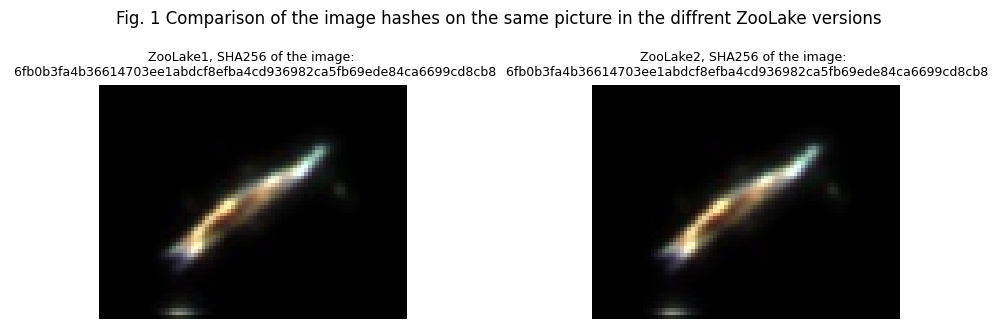

In [118]:
def hash_image(image_path: str) -> str:
    # Open the image file
    with Image.open(image_path) as img:

        # Read the binary data of the image! (without the metadata or file type)
        img_data = img.tobytes()

        # Calculate the SHA256 hash based on the binary data of the image
        return hashlib.sha256(img_data).hexdigest()
    
def plot_hash_with_image(image_paths: list[str]) -> plt:

    fig, axes = plt.subplots(1, 2, figsize=(10, 4))

    for i, path in enumerate(image_paths):


        ax = axes[i]

        Version = 1 if i == 0 or i == 2 else 2

        # open the image file
        with Image.open(path) as img:
            ax.imshow(img)
            ax.axis('off')
            ax.set_title(f"ZooLake{Version}, SHA256 of the image: \n {hash_image(path)}", size = 9)


    plt.suptitle("Fig. 1 Comparison of the image hashes on the same picture in the diffrent ZooLake versions", size = 12)
    plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.6, 
                    hspace=0.4)
    return plt

path_image1_v1 = os.path.join('..','data', 'raw', 'data', 'zooplankton_0p5x', 'aphanizomenon', 'training_data',
                              'SPC-EAWAG-0P5X-1570543372901157-3725350526242-001629-055-1224-2176-84-64.jpeg')
path_image1_v2 = os.path.join('..','data', 'raw', 'ZooLake2', 'ZooLake2.0', 'aphanizomenon', 
                              'SPC-EAWAG-0P5X-1570543372901157-3725350526242-001629-055-1224-2176-84-64.jpeg') 
path_image2_v2 = os.path.join('..','data', 'raw', 'ZooLake2', 'ZooLake2.0', 'asplanchna', 
                            'SPC-EAWAG-0P5X-1659909744341977-64416576678678-001349-111-740-216-84-68.jpeg')
    
image_path_list = [path_image1_v1, path_image1_v2]
plot_hash_with_image(image_path_list).show()

Th comparison of the identical image with its corresponding image SH256-hash reveals that the specific image has not been modified in the alternative ZooLake versions, as the hash value is identical. 

### 3.2 Example on diffrent images

In order to demonstrate that even a single different pixel leads to the generation of a different hash value using the SH256-hash algorithm, the same image is loaded twice, with the first pixel value of the image modified from (0,0,0) to (0,0,1) for the calculation of the second hash value.


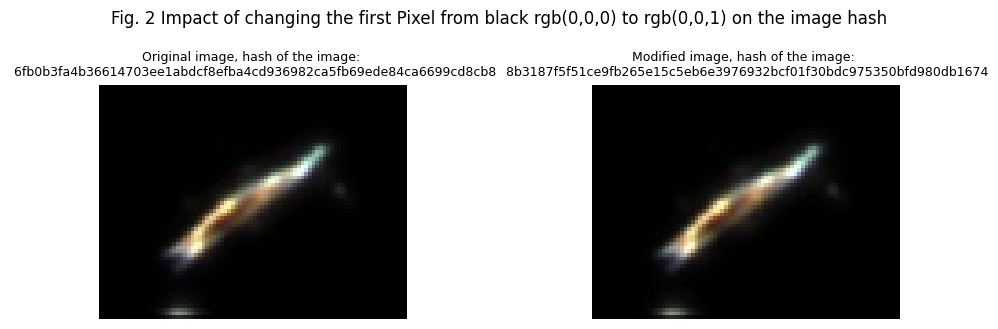

In [119]:
def change_first_pixel_color(image, new_color):
    img = image.convert('RGB')
    x = list(img.getdata())
    x[0] = new_color
    img.putdata(x)
    return img


def plot_hash_with_image_changed_pixel(image: str , new_color_rgb : tuple):
    fig, axes = plt.subplots(1, 2, figsize=(10, 4))

    # flattern array of axes into a 1D array
    axes = axes.flatten()  

    titles = ["Original image", "Modified image"]

    image_paths = [image] * 2

    for i, path in enumerate(image_paths):
        ax = axes[i]

        # open the image file
        with Image.open(path) as img:
            if i == 1:
                img = change_first_pixel_color(img, new_color_rgb)
        
            img_bytes = img.tobytes()
            hash_value  = hashlib.sha256(img_bytes).hexdigest()
            ax.imshow(img)
            ax.axis("off")
            ax.set_title(f"{titles[i]}, hash of the image: \n {hash_value}", size = 9)

    plt.suptitle("Fig. 2 Impact of changing the first Pixel from black rgb(0,0,0) to rgb(0,0,1) on the image hash", size = 12)
    plt.tight_layout()
    plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.6, 
                    hspace=0.4)
    
    plt.show()
    
plot_hash_with_image_changed_pixel(path_image1_v2, new_color_rgb=(0, 0, 1))

        

As show in the Fig. 2 even a small change that can almost not detected by human eyes leads to a complet diffrent image hash using the SHA-256 algorithm. The properties to detect even small changes and simplify the handling of each images makes the SHA256 hash algorithm useful for creating a overview dataframe that is not only based on the filename. 


### 3 Overview of the data

To simplify further analysis based on the metadata from the image, a method to create a overview dataframe for the images was made. The ZooLake

To create a list of all images in the diffrent Zoolake Versions, containg  the class `CreateOverviewDF` was created. The 


### 2.3 Raw overwiew of the data 

In order to create a overiew of the data, the most important attirubte for the class is the dictionary `zoolake_version_paths`. The dictionary contains as default the Version of Zoolakeas key as string and the path to the folder as value. For demonstratic reasons the default dictionary is given at the initialisation of the class.  as in the code cell 


```python

zoolake_version_paths = {
                "1": os.path.join("..", "data", "raw", "data" ),
                "2": os.path.join("..", "data", "raw", "ZooLake2"),
            }

```



with the Version as a string key value and the path to the diffrent images. by default the way to the 

 imports the file name and extract further metadata like timestamp, class and version  based on the image path. 

In order to import the individual images, it was deemed appropriate to search for each image within the data versions folders and save the determined path and filename inside a dictionary with some processing for th This approach was selected as it allowed for the most accurate and precise identification of the image files. The existing file paths from the text or pickle files were deliberately excluded from the process of creating the data frame. This was done to guarantee that all files inside the data version are included.

In [120]:
from datetime import datetime as dt
import os
from PIL import Image
import hashlib
from tqdm import tqdm

import imagehash
import numpy as np
import pandas as pd


def create_dataset(dic_dataset, phash = False):
    # empty list to store the defined data
    lst = []

    # loop through each dataset versions
    for version,  class_folder in dic_dataset.items():

        # loop through each class folder and keep track of the progress
        for  planton_class in tqdm(os.listdir(class_folder), total=len(os.listdir(class_folder)), desc=f'Hashing images from dataset version {version}'):

            # loop through each file/image in the class folder
            for root, _, files in os.walk(os.path.join(class_folder, planton_class)):
                for file in files:

                    # check if the file is an image
                    if file.endswith('.jpeg'):

                        # open the image to hash it
                        with open(os.path.join(root, file), 'rb') as f:
                            image = f.read()
                        
                        # hash the image
                        hash_obj = hashlib.sha256()
                        hash_obj.update(image)
                        image_hash = hash_obj.hexdigest()

                        if phash:
                        # calculate the perceptual hash
                            phash = str(imagehash.phash(Image.open(os.path.join(root, file))))
                            lst.append({'image': file,
                                        'hash_256': image_hash, 
                                        'phash' : phash, 
                                        'class': planton_class,
                                        'data_set_version': int(version),
                                        'date':  dt.fromtimestamp(int(file.split('/')[-1][15:25]))})    

                        # add more features based on filename and parent dir  
                        lst.append({'image': file,
                                              'hash_256': image_hash, 
                                              'class': planton_class,
                                              'data_set_version': int(version),
                                              'date':  dt.fromtimestamp(int(file.split('/')[-1][15:25]))})

    return lst


To load the folder we define the path to folder containing the diffrent dataset versions and run the `create_dataset` function to get the diffrent image datasets

In [121]:

zoolake_versions_dic = {'1': os.path.join('..','data','raw', 'data', 'zooplankton_0p5x'),
                        '2': os.path.join('..','data','raw', 'ZooLake2', 'ZooLake2.0')}

image_hashes = create_dataset(zoolake_versions_dic)
image_hashes_df = pd.DataFrame(image_hashes)
image_hashes_df.head()


# modular loop inside the src/create_dataset.py file

Hashing images from dataset version 2: 100%|██████████| 35/35 [00:05<00:00,  6.36it/s]


,image,hash_256,class,data_set_version,date
0,SPC-EAWAG-0P5X-1570543372901157-3725350526242-...,a957e3fb302aa924ea62f25b436893151640dc05f761c4...,aphanizomenon,1,2019-10-08 16:02:52
1,SPC-EAWAG-0P5X-1570543374882008-3725352526408-...,ae432b9dd431466a2cb61098506a1b472e363b8d4851f2...,aphanizomenon,1,2019-10-08 16:02:54
2,SPC-EAWAG-0P5X-1589472012505862-10217420880920...,70e3a671313aff3b006af2cad3626eaa4baa28361af214...,aphanizomenon,1,2020-05-14 18:00:12
3,SPC-EAWAG-0P5X-1589472120505648-10217528889899...,33980bbce3b9ac05c91d6154f6e2bdae0deddecd683a42...,aphanizomenon,1,2020-05-14 18:02:00
4,SPC-EAWAG-0P5X-1589472215513831-10217623897796...,0bb1bd78f1a9e9fe8828a5cca1881cfd110d865ed8faba...,aphanizomenon,1,2020-05-14 18:03:35


### 3 Testing of the diffrent images 



In [122]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [123]:
image_hashes_df = pd.DataFrame(image_hashes)
image_hashes_df.head()

,image,hash_256,class,data_set_version,date
0,SPC-EAWAG-0P5X-1570543372901157-3725350526242-...,a957e3fb302aa924ea62f25b436893151640dc05f761c4...,aphanizomenon,1,2019-10-08 16:02:52
1,SPC-EAWAG-0P5X-1570543374882008-3725352526408-...,ae432b9dd431466a2cb61098506a1b472e363b8d4851f2...,aphanizomenon,1,2019-10-08 16:02:54
2,SPC-EAWAG-0P5X-1589472012505862-10217420880920...,70e3a671313aff3b006af2cad3626eaa4baa28361af214...,aphanizomenon,1,2020-05-14 18:00:12
3,SPC-EAWAG-0P5X-1589472120505648-10217528889899...,33980bbce3b9ac05c91d6154f6e2bdae0deddecd683a42...,aphanizomenon,1,2020-05-14 18:02:00
4,SPC-EAWAG-0P5X-1589472215513831-10217623897796...,0bb1bd78f1a9e9fe8828a5cca1881cfd110d865ed8faba...,aphanizomenon,1,2020-05-14 18:03:35


In [124]:
def create_duplicate_df(df):
    '''Create a bar plot showing the number of duplicates per hash algorithm with each sub-column as a dataset version.'''
    
    # Get all columns with 'hash' in the name
    hash_columns = [col for col in df.columns if 'hash' in col]

    duplicate_data = []
    
    # Loop through each hash column and calculate the number of duplicates per dataset version
    for hash_col in hash_columns:
        duplicates = df[df.duplicated(subset=[hash_col, 'data_set_version'], keep=False)].copy()

        # Group by hash_col and DataSetVersion
        group_counts = (
            duplicates.groupby([hash_col, 'data_set_version'])
            .agg(
                count=('class', 'size'),  # Count the number of duplicates
                diffrent_class=('class', lambda x: x.nunique() != 1)  # True if duplicates are in different classes
            )
            .reset_index()
        )
        
        group_counts['count'] = group_counts['count'].astype(int)
               
        group_counts['hash'] = hash_col  # Add hash column for identification
        
        duplicate_data.append(group_counts)
    
    # Combine the results from each hash algorithm into a single DataFrame
    duplicate_counts_df = pd.concat(duplicate_data)

    return duplicate_counts_df

create_duplicate_df(image_hashes_df)

,hash_256,data_set_version,count,diffrent_class,hash
0,198441d850f81983c05a42682147c5b1447eceec379d90...,1,2,True,hash_256
1,5a500c455fc66fb19d5de5169170b4efb455669d2d5300...,1,2,True,hash_256
2,5ef26eef2b4e59514257758acf7c152dd4f2ae290d00a5...,1,2,True,hash_256


In [125]:
def plot_barplot_duplicates(df):
    '''Create a bar plot showing the number of duplicates per hash algorithm with each sub-column as a dataset version.'''
    
    # Combine the results from each hash algorithm into a single DataFrame
    duplicate_counts_df = create_duplicate_df(df)

    # Get all the diffrent hash algorithms
    hash_columns = duplicate_counts_df['hash'].unique()

    # Create subplots for each hash algorithm
    fig, axes = plt.subplots(1, len(hash_columns), figsize=(9 * len(hash_columns), 5))

    # Ensure axes is always a list (even if there is only one column)
    if len(hash_columns) == 1:
        axes = [axes]

    # Loop through each hash column and plot the data
    for i, hash_col in enumerate(hash_columns):
        sns.barplot( data=duplicate_counts_df[duplicate_counts_df['hash'] == hash_col],
            x='data_set_version', y='count', 
            errorbar=None, ax=axes[i], estimator=sum
        )
        
        total_duplicates = duplicate_counts_df[duplicate_counts_df['hash'] == hash_col]['count'].sum()
        axes[i].set_title(f'{hash_col} (Total: {total_duplicates})')
        axes[i].set_xlabel('ZooLake Version')
        axes[i].set_ylabel('Number of Duplicates' if i == 0 else '')
        
        # Add bar labels to each bar in the plot also 0 values
        for container in axes[i].containers:
            axes[i].bar_label(container)
        
        # Set legend to be consistent across subplots    
    plt.suptitle('Number of Duplicates per Hash Algorithm', size=14)
    plt.tight_layout()


    return plt


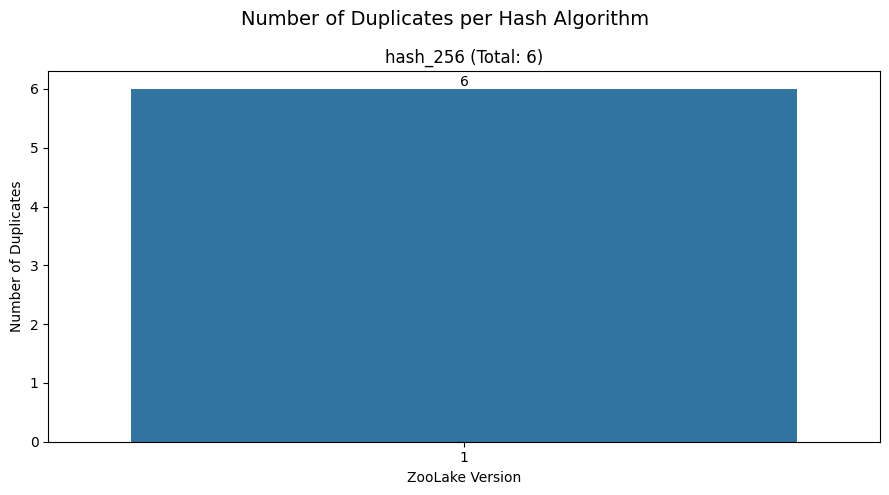

In [126]:
plot_barplot_duplicates(image_hashes_df).show()

In [127]:
def barplot_duplicates_per_class(df):
    '''create a bar plot with numbers of duplicate groups per hash alorithm with each subcolumn a datasetversion
     and a hue if the duplicates are in the same class or not'''
    
    # Combine the results from each hash algorithm into a single DataFrame
    duplicate_counts_df = create_duplicate_df(df)

    # Get all the diffrent hash algorithms
    hash_columns = duplicate_counts_df['hash'].unique()

    fig, axes = plt.subplots(1, len(hash_columns),  sharey=True)

    # Ensure axes is always a list (even if there is only one column)
    if len(hash_columns) == 1:
        axes = [axes]


    for i, hash_col in enumerate(hash_columns):

        ax = axes[i]
        
        subset = duplicate_counts_df[duplicate_counts_df['hash'] == hash_col]
        
        total_duplicates = subset['count'].sum()
        
        sns.barplot(data=subset, x ='data_set_version', y = 'count', hue = 'diffrent_class', dodge = True, errorbar = None, ax = ax, estimator=sum)
        
        ax.set_title(f'{hash_col} (Total: {total_duplicates})')
        ax.set_xlabel('ZooLake Version')
        ax.set_ylabel('Number of Duplicates')

        if len(hash_columns) > 1:
            ax.legend(title='diffrent class', labels=[ 'True', 'False'])

        #
        ax.set_prop_cycle(color=['#1f77b4', '#ff7f0e'])
        [ax.bar_label(i,) for i in ax.containers]

    plt.suptitle('Number of duplicate groups per hash algorithm with class distinction', size=16)
    plt.xlabel('ZooLake Version')
    plt.tight_layout()  
 
    return plt


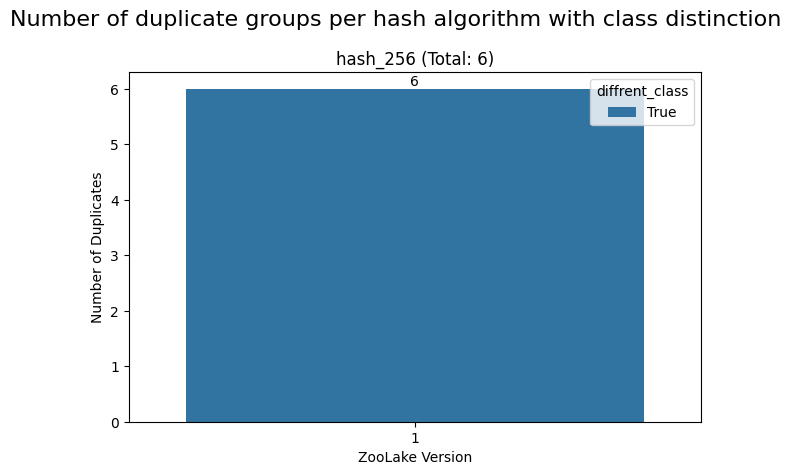

In [128]:

barplot_duplicates_per_class(image_hashes_df).show()


In [129]:
def plot_images_with_same_hash(image_hashes_df, hash_algorithm = 'hash256', dataset_version='ZooLake2', notsameclass_duplicates=True):
    ''' Plots images with the same hash value and dataset version

    Args:
        image_hashes_df: pd.DataFrame, dataframe containing image hashes and file names as column

    Returns:
        None
    '''
    if hash_algorithm == 'hash256':
        # get images with the same hash value
        duplicate_hashes = image_hashes_df[image_hashes_df.duplicated(subset=['hash_256', 'data_set_version'], keep=False)]
        # rename hash column
        duplicate_hashes = duplicate_hashes.rename(columns={'hash_256': 'hash'})

    elif hash_algorithm== 'phash':
        duplicate_hashes = image_hashes_df[image_hashes_df.duplicated(subset=['phash', 'data_set_version'], keep=False)]
        # include only 20 samples
        duplicate_hashes = duplicate_hashes.rename(columns={'phash': 'hash'})

    if dataset_version == 1:
        duplicate_hashes = duplicate_hashes[duplicate_hashes['data_set_version'] == 1]
    elif dataset_version == 2:
        duplicate_hashes = duplicate_hashes[duplicate_hashes['data_set_version'] == 2]
    else :
        duplicate_hashes = duplicate_hashes

    # filter the duplicates to include only subset of hash values with diffrent classes
    if notsameclass_duplicates:
        duplicate_hashes = duplicate_hashes.groupby('hash').filter(lambda x: x['class'].nunique() > 1)
        # filter so that only one image per class is included
        duplicate_hashes = duplicate_hashes.groupby(['hash', 'class']).head(1)

    
    # get unique hash values
    unique_hashes = duplicate_hashes['hash'].unique()

    if len(unique_hashes) == 0:
        # empty plot with message
        text_plot = f'No images with the same hash value inside Zoolake{dataset_version} using the {hash_algorithm} algorithm '
        plt.text(0.5, 0.5, s = text_plot, horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)
        plt.axis('off')
        plt.tight_layout()
        return plt

    # limit the number of images to be plotted to the 5 hash values with the most images
    unique_hashes = duplicate_hashes.groupby('hash').size().head().index

    # get the maximum number of images with the same hash value
    max_images = duplicate_hashes[duplicate_hashes['hash'].isin(unique_hashes)].groupby('hash').size().max()


    fig, axs = plt.subplots( max_images, len(unique_hashes),figsize=(8, 6))
    for j, hash_value in enumerate(unique_hashes):

        # get images with the same hash value
        images = duplicate_hashes[duplicate_hashes['hash'] == hash_value]
        images = images.sort_values(by='image')

        for i, row in enumerate(images.iterrows()):
            # read jpeg image
            if row[1]['data_set_version'] == 1:
 
                img = mpimg.imread(os.path.join(zoolake_versions_dic[str(row[1]['data_set_version'])], row[1]['class'], 'training_data', row[1]['image']))
            else:
                img = mpimg.imread(os.path.join(zoolake_versions_dic[str(row[1]['data_set_version'])], row[1]['class'], row[1]['image']))
            
            axs[i, j].imshow(img)
            axs[i, j].axis('off')
            axs[i, j].set_title(f'{hash_value[:6]} \n {row[1]["class"]}')

        # remove empty subplots
        for k in range(i+1, max_images):
            fig.delaxes(axs[k, j])

    fig.suptitle(f'Images from ZooLake{dataset_version} with same hash using the {hash_algorithm} algorithm')
    plt.tight_layout()

    return plt
   

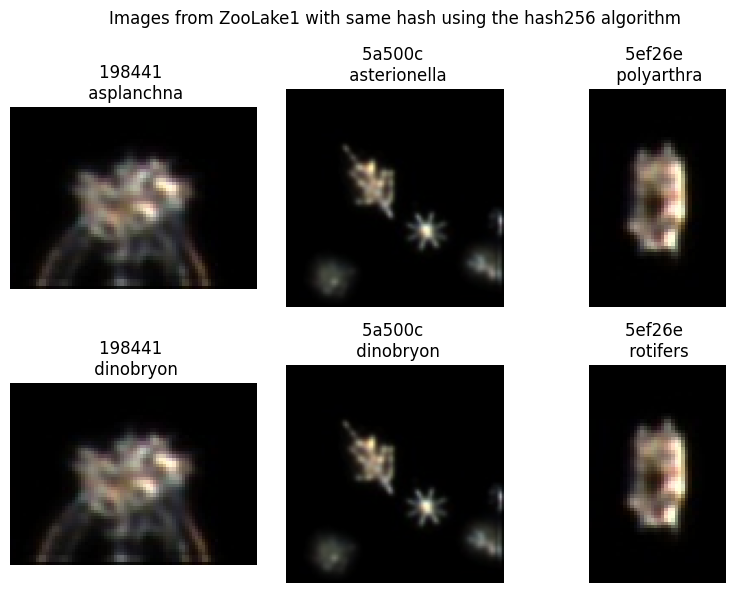

In [130]:
 
plot_images_with_same_hash(image_hashes_df, hash_algorithm='hash256', dataset_version=1).show()



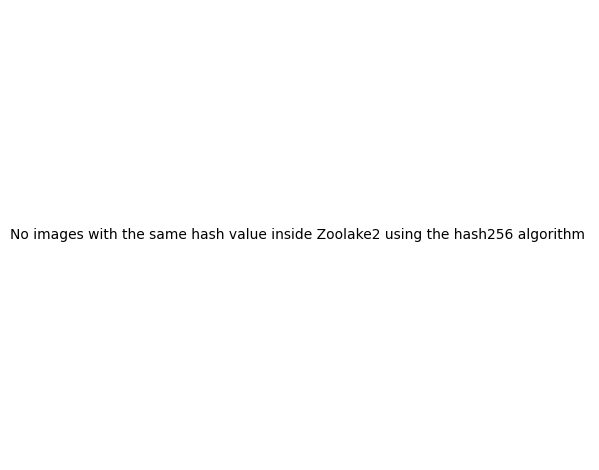

In [131]:
plot_images_with_same_hash(image_hashes_df, hash_algorithm='hash256', dataset_version=2).show()

## Test Train split

In [132]:

# check if the hash values are the same for the same image
df_grouped = image_hashes_df.groupby('image').agg(
    was_hash_same=('hash_256', lambda x: x.nunique() == 1)
).reset_index()

count_imagees_v2 = len(image_hashes_df)
print(f'From {count_imagees_v2} images, {df_grouped["was_hash_same"].sum()} have the same hash value over the diffrent versions')

count_v1    = len(image_hashes_df[image_hashes_df['DataSetVersion'] == 1])
count_v2    = len(image_hashes_df[image_hashes_df['DataSetVersion'] == 2])

print(f'difffrence in hash values between the two versions: { count_v2- count_v1 }')

From 47442 images, 29500 have the same hash value over the diffrent versions


KeyError: 'DataSetVersion'

In [20]:
# melt the dataframe to have the hash values in one column and the dataset version in another (dataversion 1 as binary cpolumn (1 is there, 0 not there), dataversion two1 is there, 0 not there)

def melt_hash_df(df):

    df['isin_dataversion_1'] = df['DataSetVersion'] == '1'
    df['isin_dataversion_2'] = df['DataSetVersion'] == '2'
    df_pivot = df.pivot_table(index='image', aggfunc='first').reset_index()

    return df_pivot


melted_df = melt_hash_df(image_hashes_df)

melted_df.head()

,image,Class,DataSetVersion,date,hash_256,isin_dataversion_1,isin_dataversion_2,phash
0,SPC-EAWAG-0P5X-1526947357532857-1089211110251-...,ceratium,1,2018-05-22 02:02:37,227e63a2e1edea75850bb0c46cd5aa31407e4572349765...,True,False,cecc613319ccc6d3
1,SPC-EAWAG-0P5X-1526947464531326-1089318119146-...,daphnia,1,2018-05-22 02:04:24,7bee32f85c871d016aa0cbcb9fc70c465103a34552c769...,True,False,97976321988c6773
2,SPC-EAWAG-0P5X-1526947603555156-1089457130702-...,daphnia,1,2018-05-22 02:06:43,0078899b14078710441335d9f3b01fd5bb1222207349f4...,True,False,8c6933ce9c3927cc
3,SPC-EAWAG-0P5X-1526947642556033-1089496133944-...,eudiaptomus,1,2018-05-22 02:07:22,dd8e818b8549018d7b96e3e6df77c44630f16374ac5d73...,True,False,99cc6633398c9bc6
4,SPC-EAWAG-0P5X-1526947868572286-1089722152732-...,daphnia,1,2018-05-22 02:11:08,1d84a5a43af59338f316b8f38be6046446bf685264e36d...,True,False,cf64309bcf3418c7


In [12]:
# Get the hashes for DataSetVersion 1 and 2
hashes_version_1 = set(image_hashes_df[image_hashes_df['DataSetVersion'] == '1']['image'])
hashes_version_2 = set(image_hashes_df[image_hashes_df['DataSetVersion'] == '2']['image'])

# Check if all hashes in version 2 are present in version 1
is_subset = hashes_version_2.issubset(hashes_version_1)

print(f"DataSetVersion 2 is a subset of DataSetVersion 1: {is_subset}")

DataSetVersion 2 is a subset of DataSetVersion 1: False


In [13]:
# Get the hashes for DataSetVersion 1 and 2
hashes_version_1 = set(image_hashes_df[image_hashes_df['DataSetVersion'] == '1']['hash_256'])
hashes_version_2 = set(image_hashes_df[image_hashes_df['DataSetVersion'] == '2']['hash_256'])

# Check if all hashes in version 2 are present in version 1
is_subset = hashes_version_2.issubset(hashes_version_1)

print(f"DataSetVersion 2 is a subset of DataSetVersion 1: {is_subset}")

DataSetVersion 2 is a subset of DataSetVersion 1: False


In [14]:
# dataset version 2 is a subset of dataset version 1 if the duplicate hashes from dataset version 1 are deleted
hashes_version_1_no_duplicates = set(image_hashes_df[image_hashes_df['DataSetVersion'] == '1'].drop_duplicates(subset='hash_256')['image'])

is_subset_no_duplicates = hashes_version_2.issubset(hashes_version_1_no_duplicates)

print(f"DataSetVersion 2 is a subset of DataSetVersion 1 without duplicates: {is_subset_no_duplicates}")

DataSetVersion 2 is a subset of DataSetVersion 1 without duplicates: False


In [15]:
# cehck which image are not in the subset

In [16]:
def split_from_duplicates(df):
    '''split the dataframe into two dataframes one with duplicates and one without duplicates'''

    # get all columns with hash in the name
    hash_columns = [col for col in df.columns if 'hash' in col]

    # get all duplicates
    duplicates = df[df.duplicated(subset=hash_columns, keep=False)]
    # get all unique images
    unique = df.drop_duplicates(subset=hash_columns, keep=False)

    return duplicates, unique